In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
def computeCost(x, y, theta):
    inner = np.power(((x * theta.T) - y), 2)

    return np.sum(inner) / 2 * len(x)

In [3]:
def gradientDescent(x, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (x * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, x[:, j])
            temp[0, j] = theta[0, j] - ((alpha / len(x)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(x, y, theta)

    return theta, cost

In [4]:
path = '../data/ex1data2.txt'
data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [5]:
# Normalize
data = (data - data.mean()) / data.std()
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [6]:
# add ones column
data.insert(0, 'Ones', 1)

In [7]:
# x training data y target variable
cols = data.shape[1]
x = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]

In [8]:
# convert to matrices and initialize theta
x = np.matrix(x.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0, 0]))

In [9]:
# linear regression
alpha = 0.01
iters = 1000
g, cost = gradientDescent(x, y, theta, alpha, iters)
g

matrix([[-1.10910099e-16,  8.78503652e-01, -4.69166570e-02]])

In [10]:
computeCost(x, y, g)

288.723743463451

Text(0.5, 1.0, 'Error vs. Training Epoch')

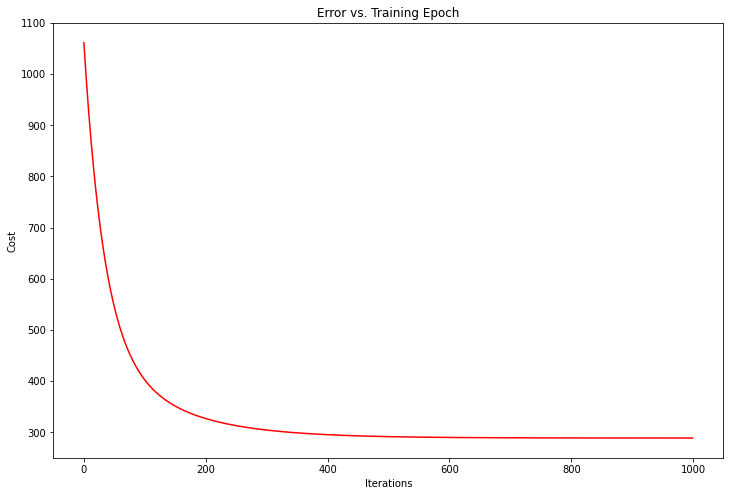

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')